# Has Singaporeans helped to **reduce** global warming by **making better transport choices?**

In [1013]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Reading data from multiple sources

In [1014]:
# read the csv datasets using pd.read_csv 
ridership = pd.read_csv('public-transport-utilisation-average-public-transport-ridership.csv')
numOfStns = pd.read_csv('number-of-mrt-and-lrt-stations.csv')
comFac = pd.read_csv('commuter-facilities.csv')
greenVehicles = pd.read_csv('climate-change-and-energy-green-vehicles.csv')

## Before Cleaning

In [1015]:
# what is in ridership ds (before cleaning)
ridership.head(5)

,year,type_of_public_transport,average_ridership
0,1995,MRT,740000
1,1995,LRT,0
2,1995,Bus,3009000
3,1995,Taxi,0
4,1996,MRT,850000


In [1016]:
# information of ridership 
# - check no. of non-null values 
# - check dtype of each column 
ridership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      88 non-null     int64 
 1   type_of_public_transport  88 non-null     object
 2   average_ridership         88 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


In [1017]:
# what is in numOfStns ds (before cleaning)
numOfStns.head(5)

,year,mrt,lrt
0,2004,65.0,20.0
1,2005,NaN,31.0
2,2006,66.0,31.0
3,2007,66.0,33.0
4,2008,68.0,NaN


In [1018]:
# information of numOfStns
# - check no. of non-null values 
# - check dtype of each column 
numOfStns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    12 non-null     int64  
 1   mrt     11 non-null     float64
 2   lrt     10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 416.0 bytes


In [1019]:
# what is in comFac ds (before cleaning)
comFac.head(5)

,year,facility,number
0,2002,Bus Interchanges,22.0
1,2002,Bus Terminals,21.0
2,2002,Bus Stops,4509.0
3,2002,Taxi Stands/Stops,133.0
4,2003,Bus Interchanges,22.0


In [1020]:
# information of comFac
# - check no. of non-null values 
# - check dtype of each column 
comFac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      48 non-null     int64  
 1   facility  48 non-null     object 
 2   number    45 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [1021]:
# what is in greenVehicles ds (before cleaning)
greenVehicles.head(5)

,year,no_of_green_vehicles
0,2003,35
1,2004,79
2,2005,198
3,2006,716
4,2007,1543


In [1022]:
# information of greenVehicles
# - check no. of non-null values 
# - check dtype of each column 
greenVehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   year                  12 non-null     int64
 1   no_of_green_vehicles  12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


## Cleaning the datasets & merging 

In [1023]:
# ridership - pivot rows into columns 
ridership = ridership.pivot_table(index="year", columns="type_of_public_transport", values="average_ridership")

# what's in ridership
ridership.head(5)

type_of_public_transport,Bus,LRT,MRT,Taxi
year,,,,
1995,3009000,0,740000,0
1996,3118000,0,850000,0
1997,3116000,0,911000,0
1998,3121000,0,946000,0
1999,3213000,27000,986000,0


In [1024]:
# comFac - drop 'bus interchanges' and 'bus terminals' as they are irrelevant 
for i in range (0,47,4):
    comFac.drop([i], inplace=True)

for i in range (1,47,4):
    comFac.drop([i], inplace=True)

# create respective columns for the number of bus stops & taxi stands
comFac = comFac.pivot_table(index='year', columns='facility', values='number')

# what's in comFac
comFac.head(5)

facility,Bus Stops,Taxi Stands/Stops
year,,
2002,4509.0,133.0
2003,4397.0,133.0
2004,4375.0,174.0
2005,4440.0,199.0
2006,4544.0,198.0


In [1025]:
# merge datasets into one dataframe (2004-2013) using pd.merge 
df = pd.merge(ridership, numOfStns, how='inner', on="year") 
df = pd.merge(df, comFac, how="inner", on="year")
df = pd.merge(df, greenVehicles, how="inner", on="year")

# what's in the dataframe (before cleaning)
df.head(8)

,year,Bus,LRT,MRT,Taxi,mrt,lrt,Bus Stops,Taxi Stands/Stops,no_of_green_vehicles
0,2004,2805000,55000,1270000,852000,65.0,20.0,4375.0,174.0,79
1,2005,2779000,69000,1321000,980000,NaN,31.0,4440.0,199.0,198
2,2006,2833000,74000,1408000,946000,66.0,31.0,4544.0,198.0,716
3,2007,2932000,79000,1527000,944000,66.0,33.0,NaN,210.0,1543
4,2008,3087000,88000,1698000,909000,68.0,NaN,4572.0,230.0,5443
5,2009,3047000,90000,1782000,860000,73.0,33.0,4581.0,232.0,7224
6,2010,3199000,100000,2069000,912000,84.0,NaN,4591.0,255.0,8711
7,2011,3385000,111000,2295000,933000,97.0,34.0,4615.0,268.0,9376


In [1026]:
# shape of df (row & columns) 
df.shape

(10, 10)

In [1027]:
# check columns in df (before cleaning)
print(df.columns, "\n")

# rename column name (easier identification)
df = df.rename(columns={"Bus":"bus_ridership", "LRT":"LRT_ridership", "MRT":"MRT_ridership", "Taxi":"taxi_ridership",
            "mrt":"no_of_mrt_stations", "lrt":"no_of_lrt_stations", "Bus Stops":"no_of_bus_stops", "Taxi Stands/Stops":"no_of_taxi_stands"})

# check columns in df (after cleaning)
print(df.columns, "\n")

# what's inside the df (after cleaning)
df.head(5)

Index(['year', 'Bus', 'LRT', 'MRT', 'Taxi', 'mrt', 'lrt', 'Bus Stops',
       'Taxi Stands/Stops', 'no_of_green_vehicles'],
      dtype='object') 

Index(['year', 'bus_ridership', 'LRT_ridership', 'MRT_ridership',
       'taxi_ridership', 'no_of_mrt_stations', 'no_of_lrt_stations',
       'no_of_bus_stops', 'no_of_taxi_stands', 'no_of_green_vehicles'],
      dtype='object') 



,year,bus_ridership,LRT_ridership,MRT_ridership,taxi_ridership,no_of_mrt_stations,no_of_lrt_stations,no_of_bus_stops,no_of_taxi_stands,no_of_green_vehicles
0,2004,2805000,55000,1270000,852000,65.0,20.0,4375.0,174.0,79
1,2005,2779000,69000,1321000,980000,NaN,31.0,4440.0,199.0,198
2,2006,2833000,74000,1408000,946000,66.0,31.0,4544.0,198.0,716
3,2007,2932000,79000,1527000,944000,66.0,33.0,NaN,210.0,1543
4,2008,3087000,88000,1698000,909000,68.0,NaN,4572.0,230.0,5443


In [1028]:
# information of df (before cleaning)
# - check no. of non-null values 
# - check dtype of each column 
print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  10 non-null     int64  
 1   bus_ridership         10 non-null     int64  
 2   LRT_ridership         10 non-null     int64  
 3   MRT_ridership         10 non-null     int64  
 4   taxi_ridership        10 non-null     int64  
 5   no_of_mrt_stations    9 non-null      float64
 6   no_of_lrt_stations    8 non-null      float64
 7   no_of_bus_stops       9 non-null      float64
 8   no_of_taxi_stands     10 non-null     float64
 9   no_of_green_vehicles  10 non-null     int64  
dtypes: float64(4), int64(6)
memory usage: 880.0 bytes
None 



In [1029]:
# check for number of duplicate values in 'year' column
df['year'].duplicated().sum()

0

In [1030]:
# numerical summary of dataframe
df.describe().round(2)

,year,bus_ridership,LRT_ridership,MRT_ridership,taxi_ridership,no_of_mrt_stations,no_of_lrt_stations,no_of_bus_stops,no_of_taxi_stands,no_of_green_vehicles
count,10.00,10.00,10.0,10.00,10.00,9.00,8.00,9.00,10.00,10.00
mean,2008.50,3114900.00,92200.0,1851800.00,927000.00,80.33,31.38,4551.56,230.50,5344.70
std,3.03,293924.57,24629.7,499195.98,43916.59,16.20,4.81,87.46,34.50,4296.19
min,2004.00,2779000.00,55000.0,1270000.00,852000.00,65.00,20.00,4375.00,174.00,79.00
25%,2006.25,2857750.00,75250.0,1437750.00,909750.00,66.00,31.00,4544.00,201.75,922.75
50%,2008.50,3067000.00,89000.0,1740000.00,938500.00,73.00,33.00,4581.00,231.00,6333.50
75%,2010.75,3338500.00,108250.0,2238500.00,961750.00,97.00,34.00,4608.00,264.75,9209.75
max,2013.00,3601000.00,132000.0,2623000.00,980000.00,105.00,35.00,4638.00,270.00,10277.00


## Identify and handle missing values

<AxesSubplot:>

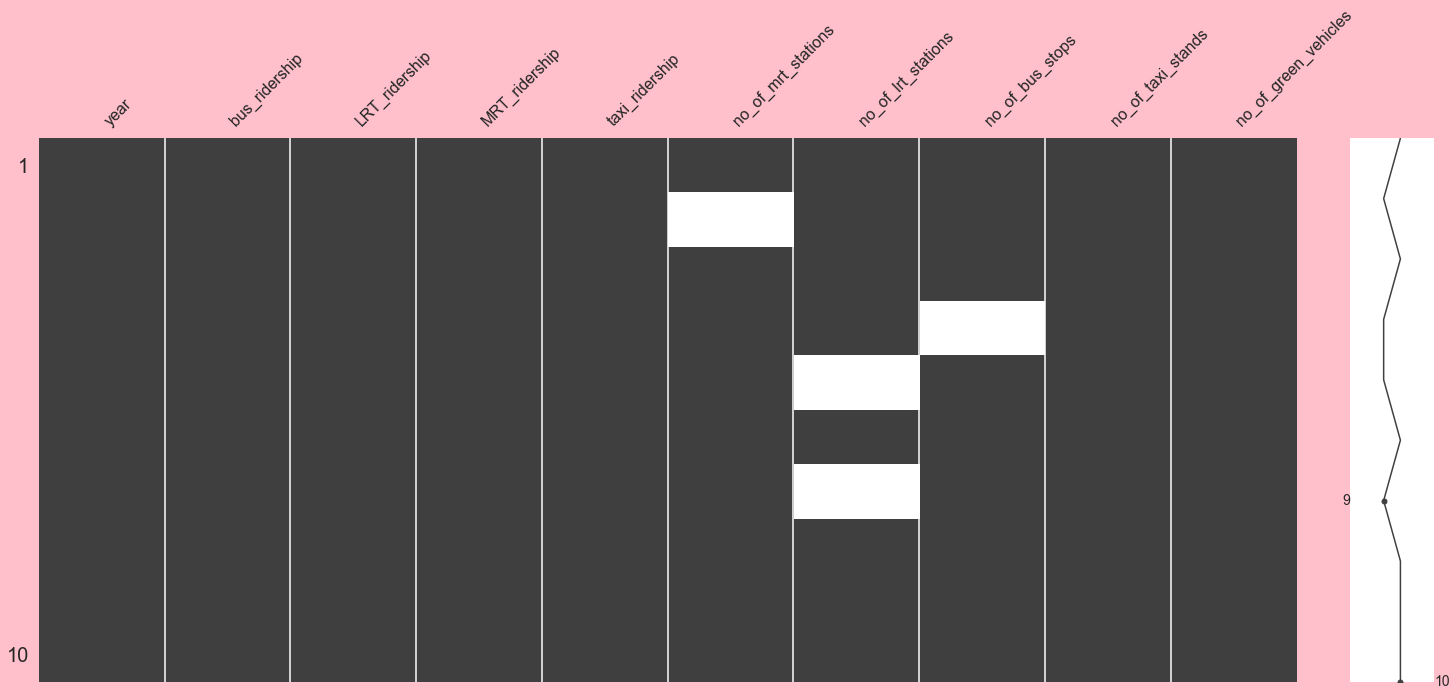

In [1031]:
# visualisation of missing values in df (before cleaning)
msno.matrix(df)

In [1032]:
# check for missing values (before cleaning)
# returns True if there are missing/null values
print("Before Cleaning:\n\n", df.isnull().values.any())

# check for number of null values for entire dataframe
print(df.isnull().sum().sum())

# check for number of null values in each column
print(df.isnull().sum(), "\n")

# handling missing values - by filling gaps forward
df = df.fillna(method='pad')

# check for missing values (after cleaning)
# returns True if there are missing/null values
print("After Cleaning:\n\n", df.isnull().values.any())

# check for number of null values for entire dataframe
print(df.isnull().sum().sum())

# check for number of null values in each column
print(df.isnull().sum())

Before Cleaning:

 True
4
year                    0
bus_ridership           0
LRT_ridership           0
MRT_ridership           0
taxi_ridership          0
no_of_mrt_stations      1
no_of_lrt_stations      2
no_of_bus_stops         1
no_of_taxi_stands       0
no_of_green_vehicles    0
dtype: int64 

After Cleaning:

 False
0
year                    0
bus_ridership           0
LRT_ridership           0
MRT_ridership           0
taxi_ridership          0
no_of_mrt_stations      0
no_of_lrt_stations      0
no_of_bus_stops         0
no_of_taxi_stands       0
no_of_green_vehicles    0
dtype: int64


<AxesSubplot:>

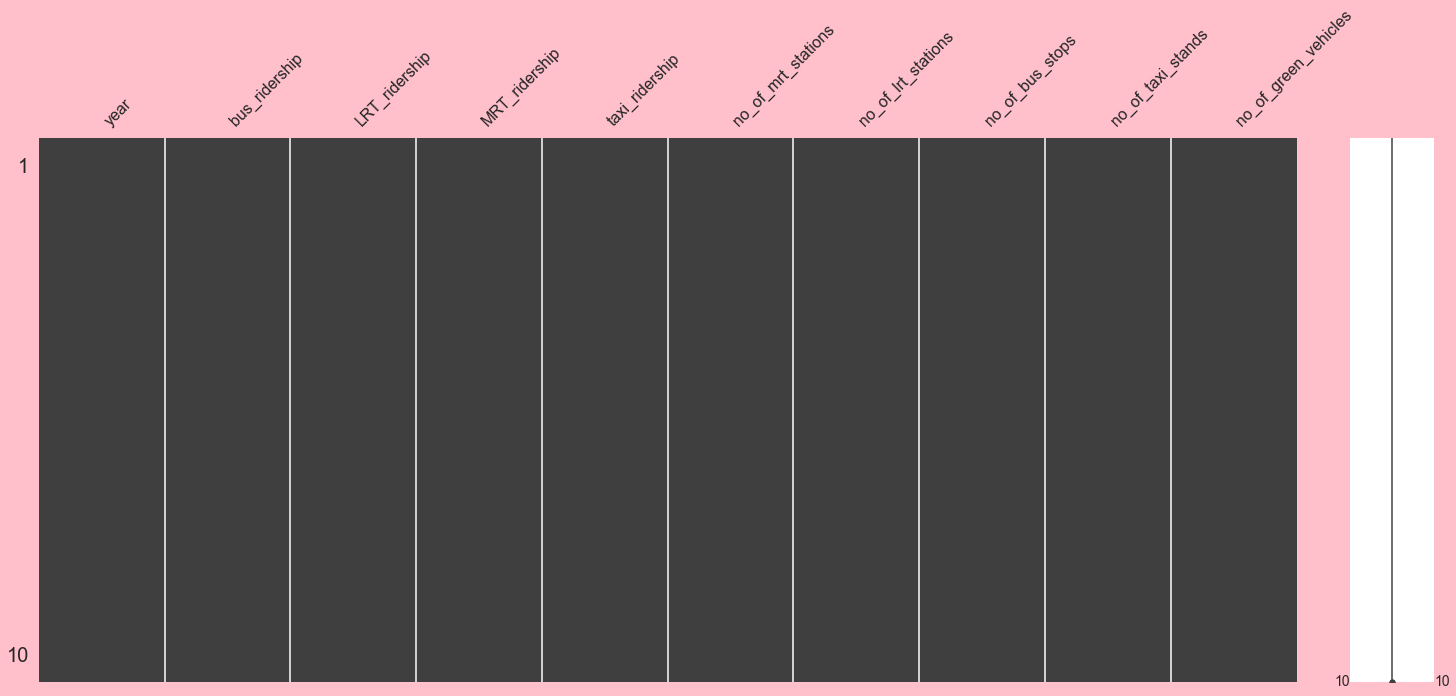

In [1033]:
# visualisation of missing values in df (after cleaning)
msno.matrix(df)

## Identify and handle outliers

number of outliers in 'no_of_lrt_stations': 1
max outlier value: 20.0
min outlier value: 20.0


number of outliers in 'no_of_bus_stops': 2
max outlier value: 4440.0
min outlier value: 4375.0


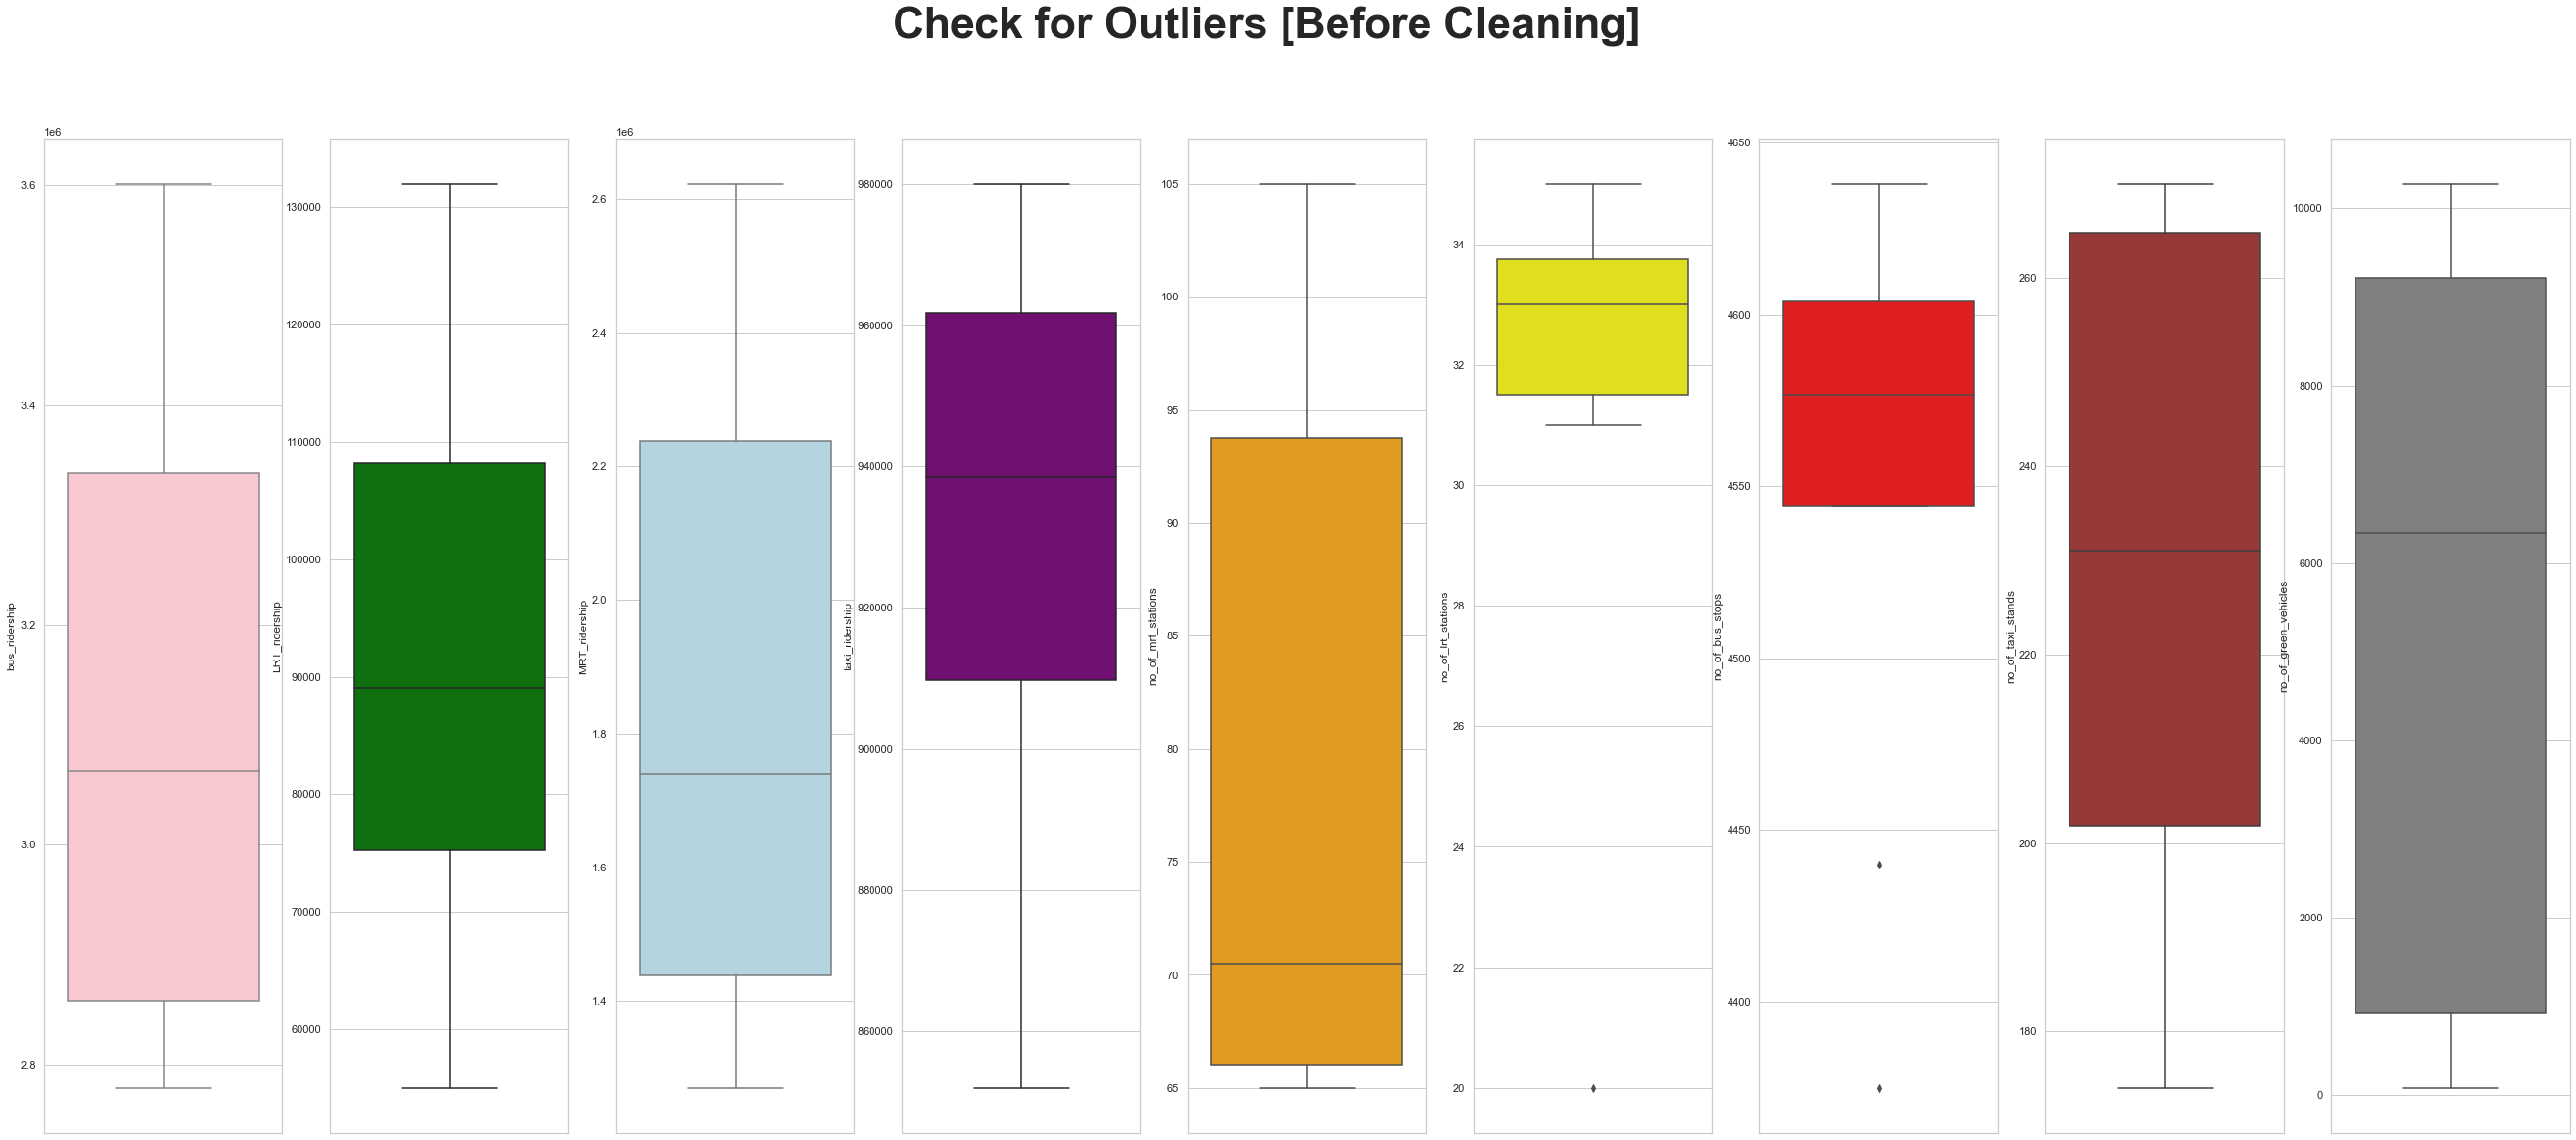

In [1034]:
# identify outliers by plotting box plots 
# set grid
sns.set_style('whitegrid')

# plot box plot to check for outliers (before cleaning)
# create figure & axis
fig, ax = plt.subplots(1,9, figsize=(47,19))
# set title for overall figure
fig.suptitle('Check for Outliers [Before Cleaning]', weight="bold", fontsize=45)

# plot boxplots for all columns except 'year' 
plt.subplot(191)
sns.boxplot(y=df['bus_ridership'], color='pink')
plt.subplot(192)
sns.boxplot(y=df['LRT_ridership'], color='green')
plt.subplot(193)
sns.boxplot(y=df['MRT_ridership'], color='lightblue')
plt.subplot(194)
sns.boxplot(y=df['taxi_ridership'], color='purple')
plt.subplot(195)
sns.boxplot(y=df['no_of_mrt_stations'], color='orange')
plt.subplot(196)
sns.boxplot(y=df['no_of_lrt_stations'], color='yellow')
plt.subplot(197)
sns.boxplot(y=df['no_of_bus_stops'], color='red')
plt.subplot(198)
sns.boxplot(y=df['no_of_taxi_stands'], color='brown')
plt.subplot(199)
sns.boxplot(y=df['no_of_green_vehicles'], color='grey')
 
# since the boxplots above shows that there are outliers present in 'no_of_bus_stops' & 'no_of_lrt_stations', the below will identify the specific values of the outliers
# create a function (find outliers using IQR)
# outliers are values that fall below q1-1.5*IQR or those that fall above q3+1.5*IQR
def findOutliers(df):
   # q1 = 25th percentile of df
   q1 = df.quantile(0.25)
   # q3 = 75th percentile of df
   q3 = df.quantile(0.75)
   # interquartile range
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

# outliers in 'no_of_lrt_stations'
outliersLrt = findOutliers(df["no_of_lrt_stations"])

# details of outliers
print("number of outliers in 'no_of_lrt_stations': " + str(len(outliersLrt)))
print("max outlier value: " + str(outliersLrt.max()))
print("min outlier value: " + str(outliersLrt.min()))

# outliers in 'no_of_bus_stops'
print("\n")
outliersBus = findOutliers(df["no_of_bus_stops"])

# details of outliers
print("number of outliers in 'no_of_bus_stops': " + str(len(outliersBus)))
print("max outlier value: " + str(outliersBus.max()))
print("min outlier value: " + str(outliersBus.min()))

<AxesSubplot:ylabel='no_of_green_vehicles'>

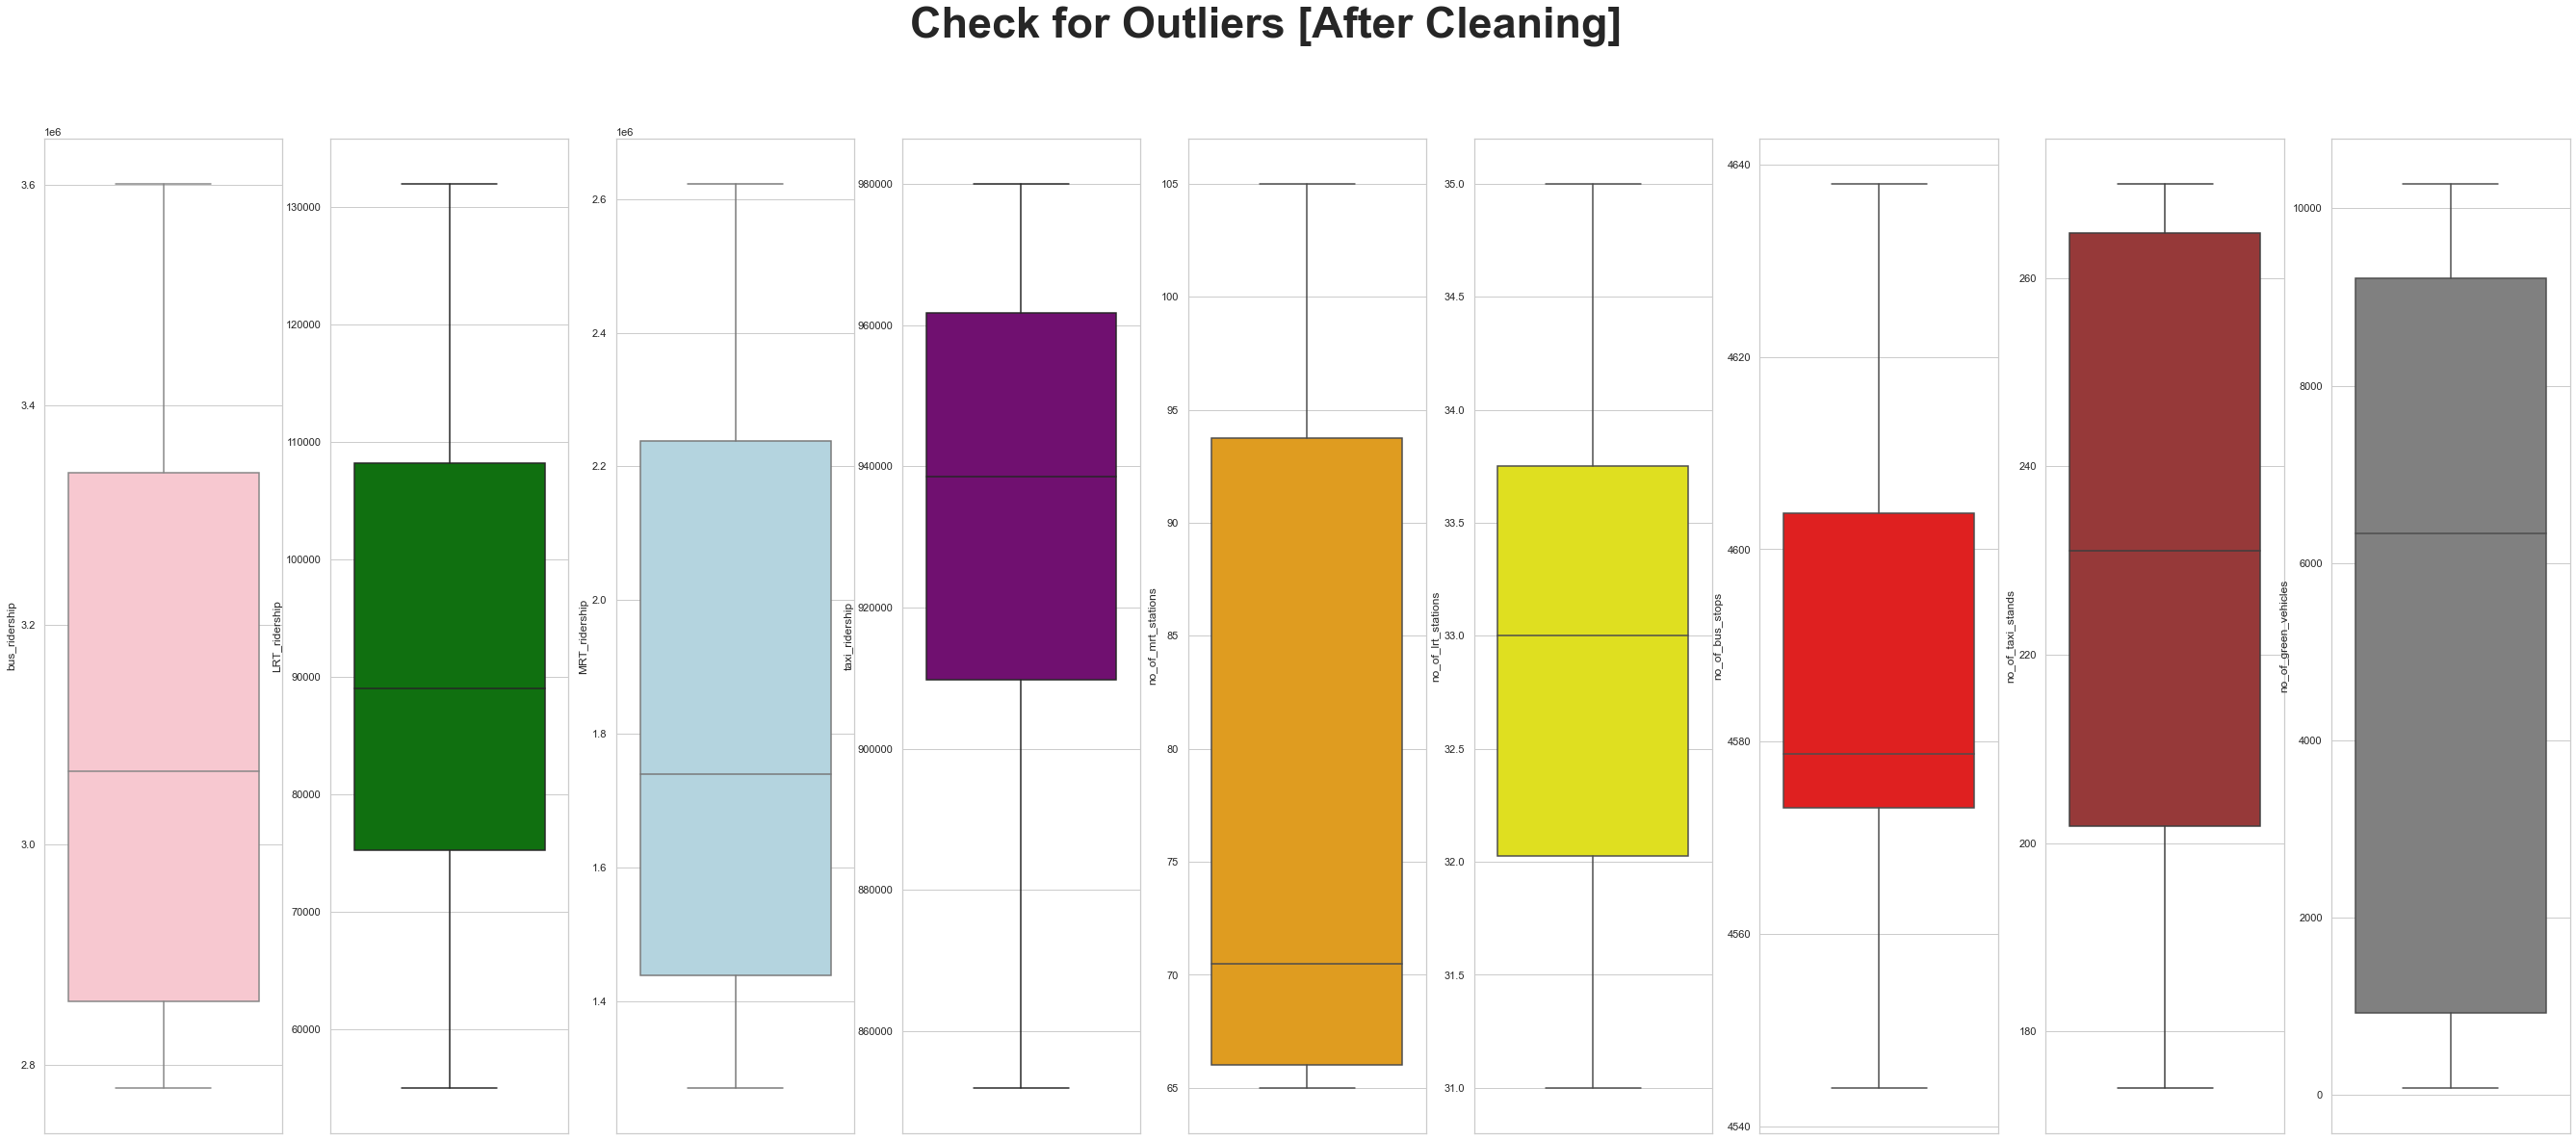

In [1035]:
# handling outliers in 'no_of_lrt_stations' by replacing them with the mean as it has a pretty normal distribution
# calculate median in 'no_of_lrt_stations' 
mean = df['no_of_lrt_stations'].mean()
# replace '20' with median
df['no_of_lrt_stations'] = df['no_of_lrt_stations'].replace(20, mean)

# handling outliers in 'no_of_bus_stops' by replacing them with the median as it has a skewed distribution
# calculate median in 'no_of_bus_stops' 
median = df['no_of_bus_stops'].median()
# replace '4440.0' with median
df['no_of_bus_stops'] = df['no_of_bus_stops'].replace(4440.0, median)
# replace '4375.0' with median
df['no_of_bus_stops'] = df['no_of_bus_stops'].replace(4375.0, median)

# identify outliers by plotting box plots 
# set grid
sns.set_style('whitegrid')

# plot box plot to check for outliers (after cleaning)
# create figure & axis
fig, ax = plt.subplots(1,9, figsize=(47,19))
# set title for overall figure
fig.suptitle('Check for Outliers [After Cleaning]', weight="bold", fontsize=45)

# plot boxplots for all columns except 'year' 
plt.subplot(191)
sns.boxplot(y=df['bus_ridership'], color='pink')
plt.subplot(192)
sns.boxplot(y=df['LRT_ridership'], color='green')
plt.subplot(193)
sns.boxplot(y=df['MRT_ridership'], color='lightblue')
plt.subplot(194)
sns.boxplot(y=df['taxi_ridership'], color='purple')
plt.subplot(195)
sns.boxplot(y=df['no_of_mrt_stations'], color='orange')
plt.subplot(196)
sns.boxplot(y=df['no_of_lrt_stations'], color='yellow')
plt.subplot(197)
sns.boxplot(y=df['no_of_bus_stops'], color='red')
plt.subplot(198)
sns.boxplot(y=df['no_of_taxi_stands'], color='brown')
plt.subplot(199)
sns.boxplot(y=df['no_of_green_vehicles'], color='grey')

In [1036]:
# change the dtype of number of commuter facilities from float to integer
df['no_of_mrt_stations'] = df['no_of_mrt_stations'].astype('i8')
df['no_of_lrt_stations'] = df['no_of_lrt_stations'].astype('i8')
df['no_of_bus_stops'] = df['no_of_bus_stops'].astype('i8')
df['no_of_taxi_stands'] = df['no_of_taxi_stands'].astype('i8')

# information of df (after cleaning)
# - check no. of non-null values 
# - check dtype of each column 
print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   year                  10 non-null     int64
 1   bus_ridership         10 non-null     int64
 2   LRT_ridership         10 non-null     int64
 3   MRT_ridership         10 non-null     int64
 4   taxi_ridership        10 non-null     int64
 5   no_of_mrt_stations    10 non-null     int64
 6   no_of_lrt_stations    10 non-null     int64
 7   no_of_bus_stops       10 non-null     int64
 8   no_of_taxi_stands     10 non-null     int64
 9   no_of_green_vehicles  10 non-null     int64
dtypes: int64(10)
memory usage: 880.0 bytes
None 



## Write the finalised cleansed dataset to a file

In [1037]:
# write the finalised cleansed dataset to a file
df.to_csv('df_cleaned.csv')


## - - - - Using the cleansed data to produce meaningful insights! - - - -

## **1. Do Singaporeans choose to take public over private transport?**

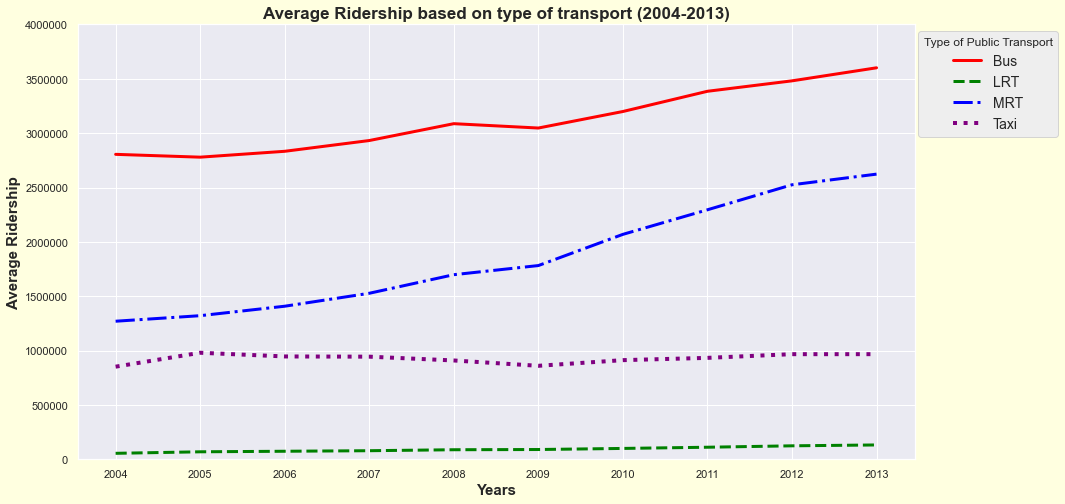

In [1038]:
# import modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set_style(style="darkgrid")
# set figure size & facecolor
sns.set(rc={"figure.figsize":(15,8), 'figure.facecolor':'lightyellow'})

# create a figure & axis
fig, ax = plt.subplots()

# plot line plots
sns.lineplot(data=df, x="year", y="bus_ridership", label="Bus", color='red', linewidth=3)
sns.lineplot(data=df, x="year", y="LRT_ridership", label="LRT", color='green', linewidth=3, linestyle="dashed")
sns.lineplot(data=df, x="year", y="MRT_ridership", label="MRT", color='blue', linewidth=3, linestyle="dashdot")
sns.lineplot(data=df, x="year", y="taxi_ridership", label="Taxi", color='purple', linewidth=4, linestyle="dotted")

# set title & axis labels 
plt.title(label="Average Ridership based on type of transport (2004-2013)", weight="bold", fontsize=17)
ax.set_xlabel("Years", fontsize=15, weight='bold')
ax.set_ylabel("Average Ridership", fontsize=15, weight='bold')
ax.set(ylim=(0,4000000))
ax.set_xticks([2004,2005,2006,2007,2008,2009,2010,2011,2012,2013])

# remove scientific notation (y axis format from decimal to whole no.)
plt.ticklabel_format(style='plain', axis='y')

# change the legends location & set fontsize
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.18,1), title="Type of Public Transport", fontsize=14)

## **2. Has Singapore made public transport more accessible as compared to private transport?**

In [1039]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# extract rows for year 2004 and 2013
df_2004 = df[df['year'] == 2004]
df_2013 = df[df['year'] == 2013]

# group by year and extract the required columns
grouped_2004 = df_2004.groupby('year')[['no_of_mrt_stations', 'no_of_bus_stops', 'no_of_taxi_stands', 'no_of_lrt_stations']]
grouped_2013 = df_2013.groupby('year')[['no_of_mrt_stations', 'no_of_bus_stops', 'no_of_taxi_stands', 'no_of_lrt_stations']]

# get the values for each year
values_2004 = grouped_2004.sum().values[0]
values_2013 = grouped_2013.sum().values[0]

# get labels
labels = ['no_of_mrt_stations', 'no_of_bus_stops', 'no_of_taxi_stands', 'no_of_lrt_stations']

# create subplots
# use 'domain' type 
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
# plot pie chart (past)
fig.add_trace(go.Pie(labels=labels, values=values_2004, name="2004", marker_colors=px.colors.diverging.Portland, scalegroup='one'),
              1, 1)
# plot pie chart (present)
fig.add_trace(go.Pie(labels=labels, values=values_2013, name="2013", scalegroup='one'),
              1, 2)

# create a donut-like pie chart (hole)
fig.update_traces(hole=.4)

# set layout title 
fig.update_layout(
    title_text="The number of commuter facilities in 2004 vs. 2013",
    # add annotations in the center of the donut pie charts
    annotations=[dict(text='2004', x=0.19, y=0.5, font_size=25, showarrow=False),
                 dict(text='2013', x=0.81, y=0.5, font_size=25, showarrow=False)])

# outline of pie charts
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
# uniform text size
fig.update_layout(uniformtext_minsize=13)

# show the pie charts
fig.show()

## **3. Has building more commuter facilities result in more people opting public transport?**

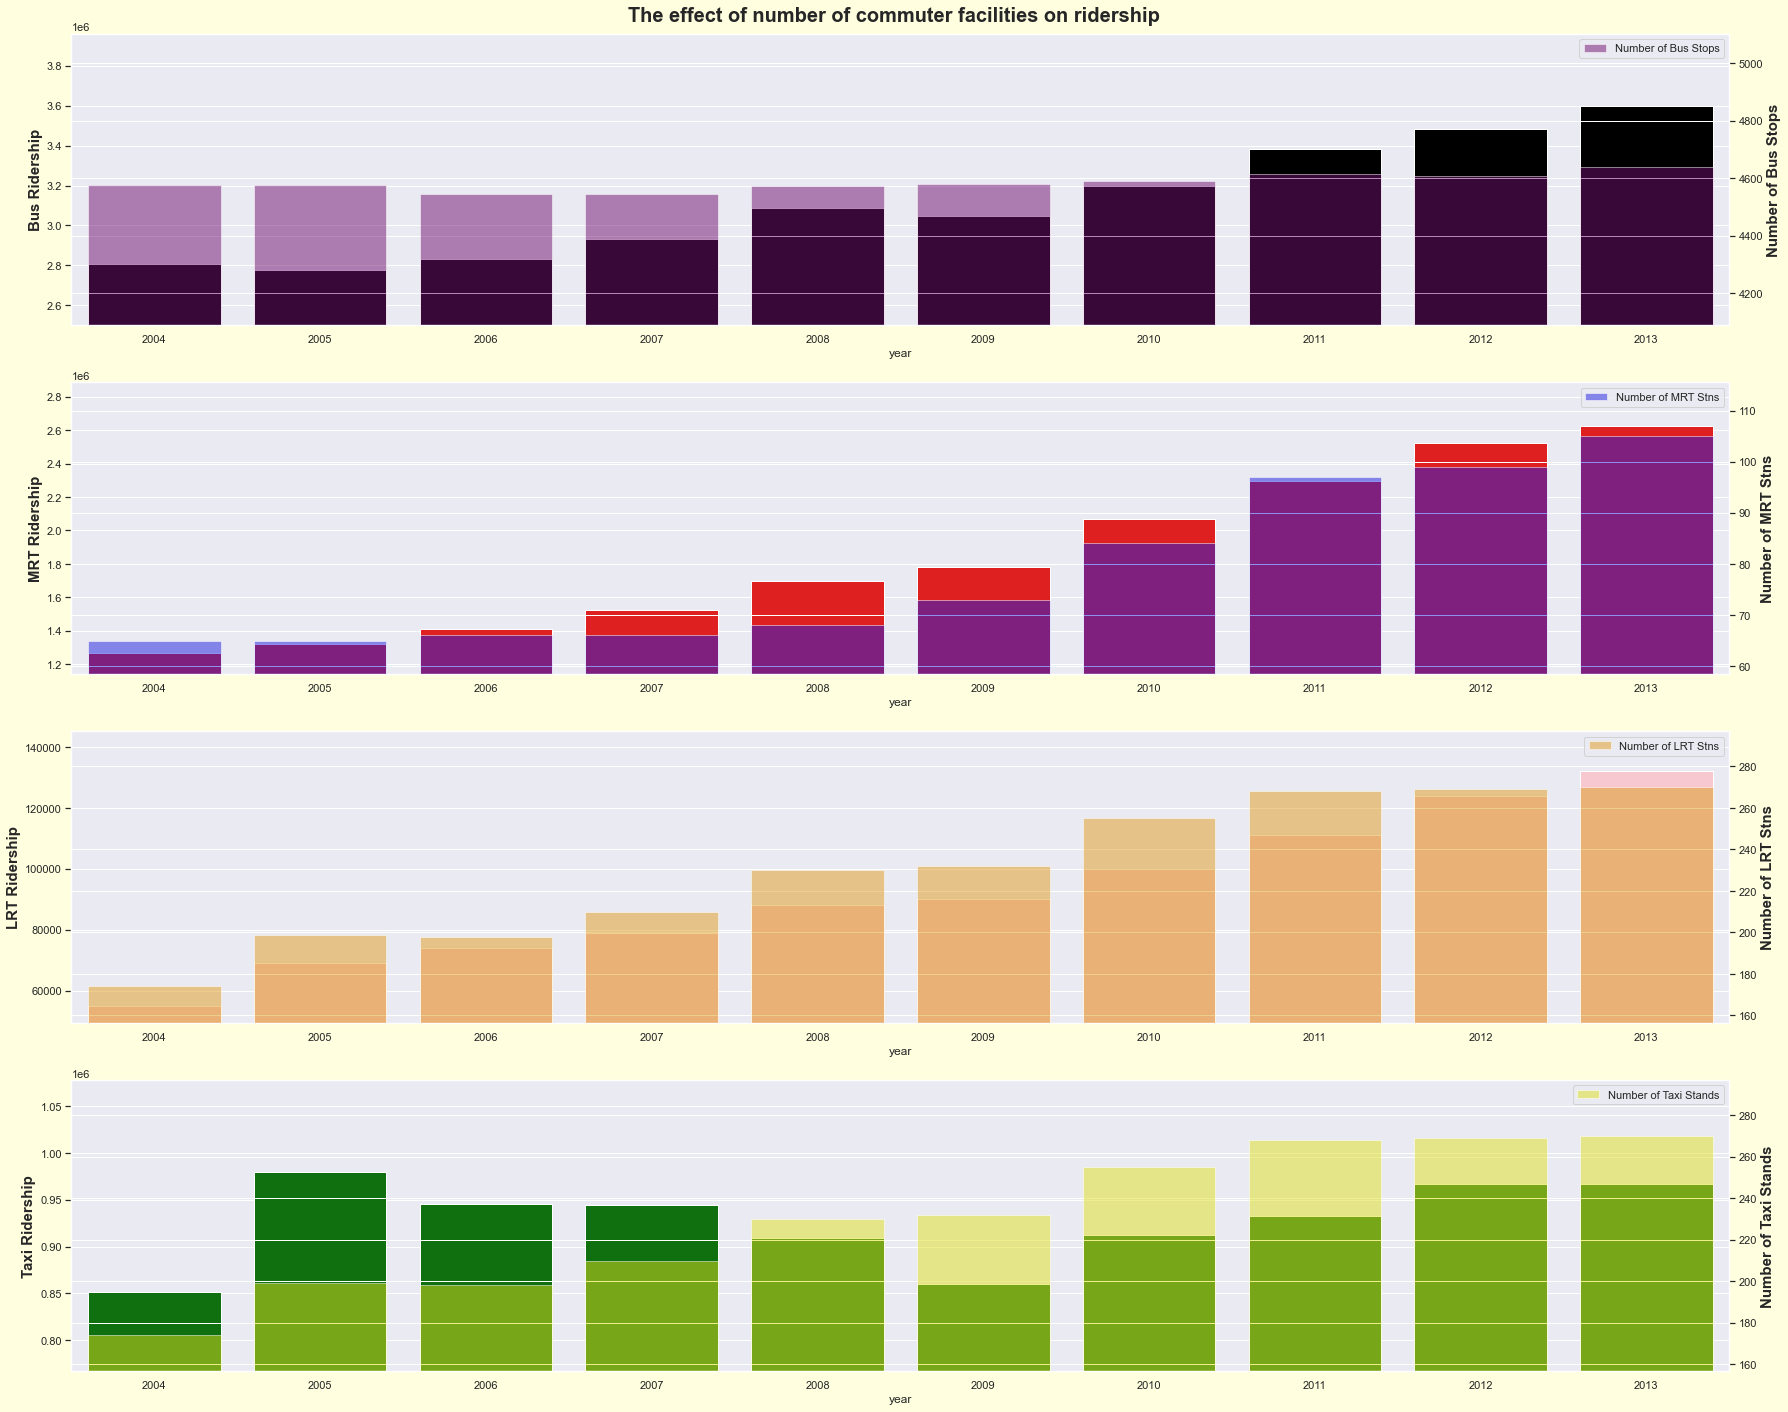

In [1057]:
# set style
sns.set_style(style="darkgrid")
# set figure size & facecolor
sns.set(rc={"figure.figsize":(25,20), 'figure.facecolor':'lightyellow'})

# create a function to plot bar-bar chart
def plot_bar_bar(df, x_col, y1_col, y2_col, ax, color1, color2, label1, label2):
    sns.barplot(data=df, x=x_col, y=y1_col, ax=ax, color=color1, label=label1)
    ax2 = ax.twinx()
    sns.barplot(data=df, x=x_col, y=y2_col, alpha=0.5, ax=ax2, color=color2, label=label2)
    ax.set_ylabel(label1, weight="bold", fontsize=15)
    ax2.set_ylabel(label2, weight="bold", fontsize=15)
    # set y-limits for each axis
    y1_min, y1_max = df[y1_col].min(), df[y1_col].max()
    y2_min, y2_max = df[y2_col].min(), df[y2_col].max()
    ax.set_ylim(y1_min - (0.1 * y1_min), y1_max + (0.1 * y1_max))
    ax2.set_ylim(y2_min - (0.1 * y2_min), y2_max + (0.1 * y2_max))
    
# create a figure & axis
fig, ax = plt.subplots(4,1)
fig.suptitle("The effect of number of commuter facilities on ridership", weight="bold", fontsize=20)

# plot the first bar-line chart
plot_bar_bar(df, "year", "bus_ridership", "no_of_bus_stops",  ax=ax[0], color1="black", color2="purple", label1="Bus Ridership", label2="Number of Bus Stops")
plt.legend()

# plot the second bar-line chart
plot_bar_bar(df, "year", "MRT_ridership", "no_of_mrt_stations", ax=ax[1], color1="red", color2="blue", label1="MRT Ridership", label2="Number of MRT Stns")
plt.legend()

# plot the third bar-line chart
plot_bar_bar(df, "year", "LRT_ridership", "no_of_taxi_stands", ax=ax[2], color1="pink", color2="orange", label1="LRT Ridership", label2="Number of LRT Stns")
plt.legend()

# plot the fourth bar-line chart
plot_bar_bar(df, "year", "taxi_ridership", "no_of_taxi_stands", ax=ax[3], color1="green", color2="yellow", label1="Taxi Ridership", label2="Number of Taxi Stands")
plt.legend()

plt.tight_layout()
plt.show()

## **4. Has Singaporeans choose to buy eco-friendly cars over fuel-run cars?**

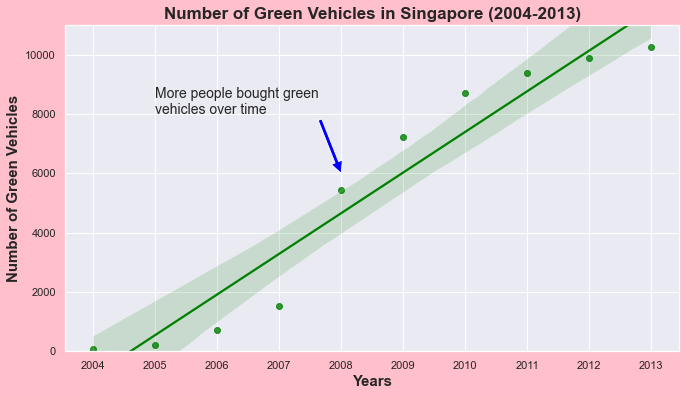

In [1043]:
# import modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# group the data by year and sum the number of green vehicles
df_grouped = df.groupby(['year'])['no_of_green_vehicles'].sum().reset_index()

# get years (x-axis)
years = df_grouped['year']
# get the number of green vehicles (y-axis)
yGreenVehicles = df_grouped['no_of_green_vehicles']

# set style
sns.set_style("whitegrid")
# set figure size & facecolor
sns.set(rc={"figure.figsize":(11,6), 'figure.facecolor':'pink'})

# create a figure & axis
fig, ax = plt.subplots()

# plot regplot
sns.regplot(x=years, y=yGreenVehicles, color="green", ax=ax)

# set y-axis limit & xticks
ax.set(ylim=(0, 11000), xticks=years)

# set x, y-axis labels
ax.set_xlabel("Years", weight="bold", fontsize=15)
ax.set_ylabel("Number of Green Vehicles", weight="bold", fontsize=15)
# set title
ax.set_title("Number of Green Vehicles in Singapore (2004-2013)", weight="bold", fontsize=17)

# graph annotations
ax.annotate('More people bought green\nvehicles over time', xy=(2008,6000), xytext=(2005,8000),
            arrowprops=dict(facecolor='blue'), fontsize=14)

# show the graph
plt.show()

## End of Assignment
- Name: Ashley Bai
- Admin Number: P2237871
- Class: DAAA/FT/1B/04